In [97]:
import pandas as pd
import numpy as np
import random as rd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import roc_curve
from patsy import dmatrices
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [98]:
heart=pd.read_csv("heart.csv")
#First five rows of the file
print("\nThe first five rows are as below :")
heart.head()



The first five rows are as below :


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [99]:
print("\n Column data information : \n")
heart.info()


 Column data information : 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [100]:
print("The shape of dataset is:",heart.shape) #first one is rows and second one is columns
# The data has in total 303 rows and 14 columns, the last column 'target' is the response variable.
# There are 8 categorical variables and 5 numerical variables excluding the response variable.
# The value 1 of Target means the patient has a heart disease while 0 means patient does not have heart disease.

The shape of dataset is: (303, 14)


Driving Question: Finding how and which factors are key influencers in predicting the presence of heart disease in a person . 

#### Data cleaning

In [101]:
print("The number of heart.isnull().values.any()missing values in the data columnwise: ")
heart.isnull().sum()
# We do not have any null values in our dataset

The number of heart.isnull().values.any()missing values in the data columnwise: 


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [102]:
# Since the columns name in the dataset are not very intuitive, we have renamed the columns so that it becomes easier to understand the data.
heart=heart.rename(columns={'age':'Age','sex':'Sex_M','cp':'Chest_pain','trestbps':'Resting_BP','chol':'Cholesterol','fbs':'Fasting_blood_sugar','restecg':'Resting_ECG','thalach':'Max_Heart_Rate','exang':'Exercise_Induced_Angina','oldpeak':'ST_depression','slope':'ST_slope','ca':'Vessels_coloured_flouroscopy','thal':'Thalassemia','target':'Target'})
heart.head()

,Age,Sex_M,Chest_pain,Resting_BP,Cholesterol,Fasting_blood_sugar,Resting_ECG,Max_Heart_Rate,Exercise_Induced_Angina,ST_depression,ST_slope,Vessels_coloured_flouroscopy,Thalassemia,Target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [103]:
#Since Thalassemia column had some 0 values which were null, so we are removing them from our dataset
heart['Thalassemia'].replace(0,np.nan,inplace=True)

In [104]:
heart.dropna(subset=['Thalassemia'],inplace=True)
heart.shape

(301, 14)

In [105]:
heart.describe()
#Describe is useful for analyzing the numerical variables
# Age: Max: 
# The average age in the dataset is 54.36
# The average resting blood sugar level in the dataset is 131.62


,Age,Sex_M,Chest_pain,Resting_BP,Cholesterol,Fasting_blood_sugar,Resting_ECG,Max_Heart_Rate,Exercise_Induced_Angina,ST_depression,ST_slope,Vessels_coloured_flouroscopy,Thalassemia,Target
count,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000
mean,54.378738,0.684385,0.966777,131.647841,246.504983,0.146179,0.528239,149.740864,0.325581,1.043189,1.398671,0.734219,2.328904,0.544850
std,9.110950,0.465534,1.032259,17.594002,51.915998,0.353874,0.526023,22.891031,0.469372,1.163384,0.616872,1.024268,0.584347,0.498814
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,134.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.000000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


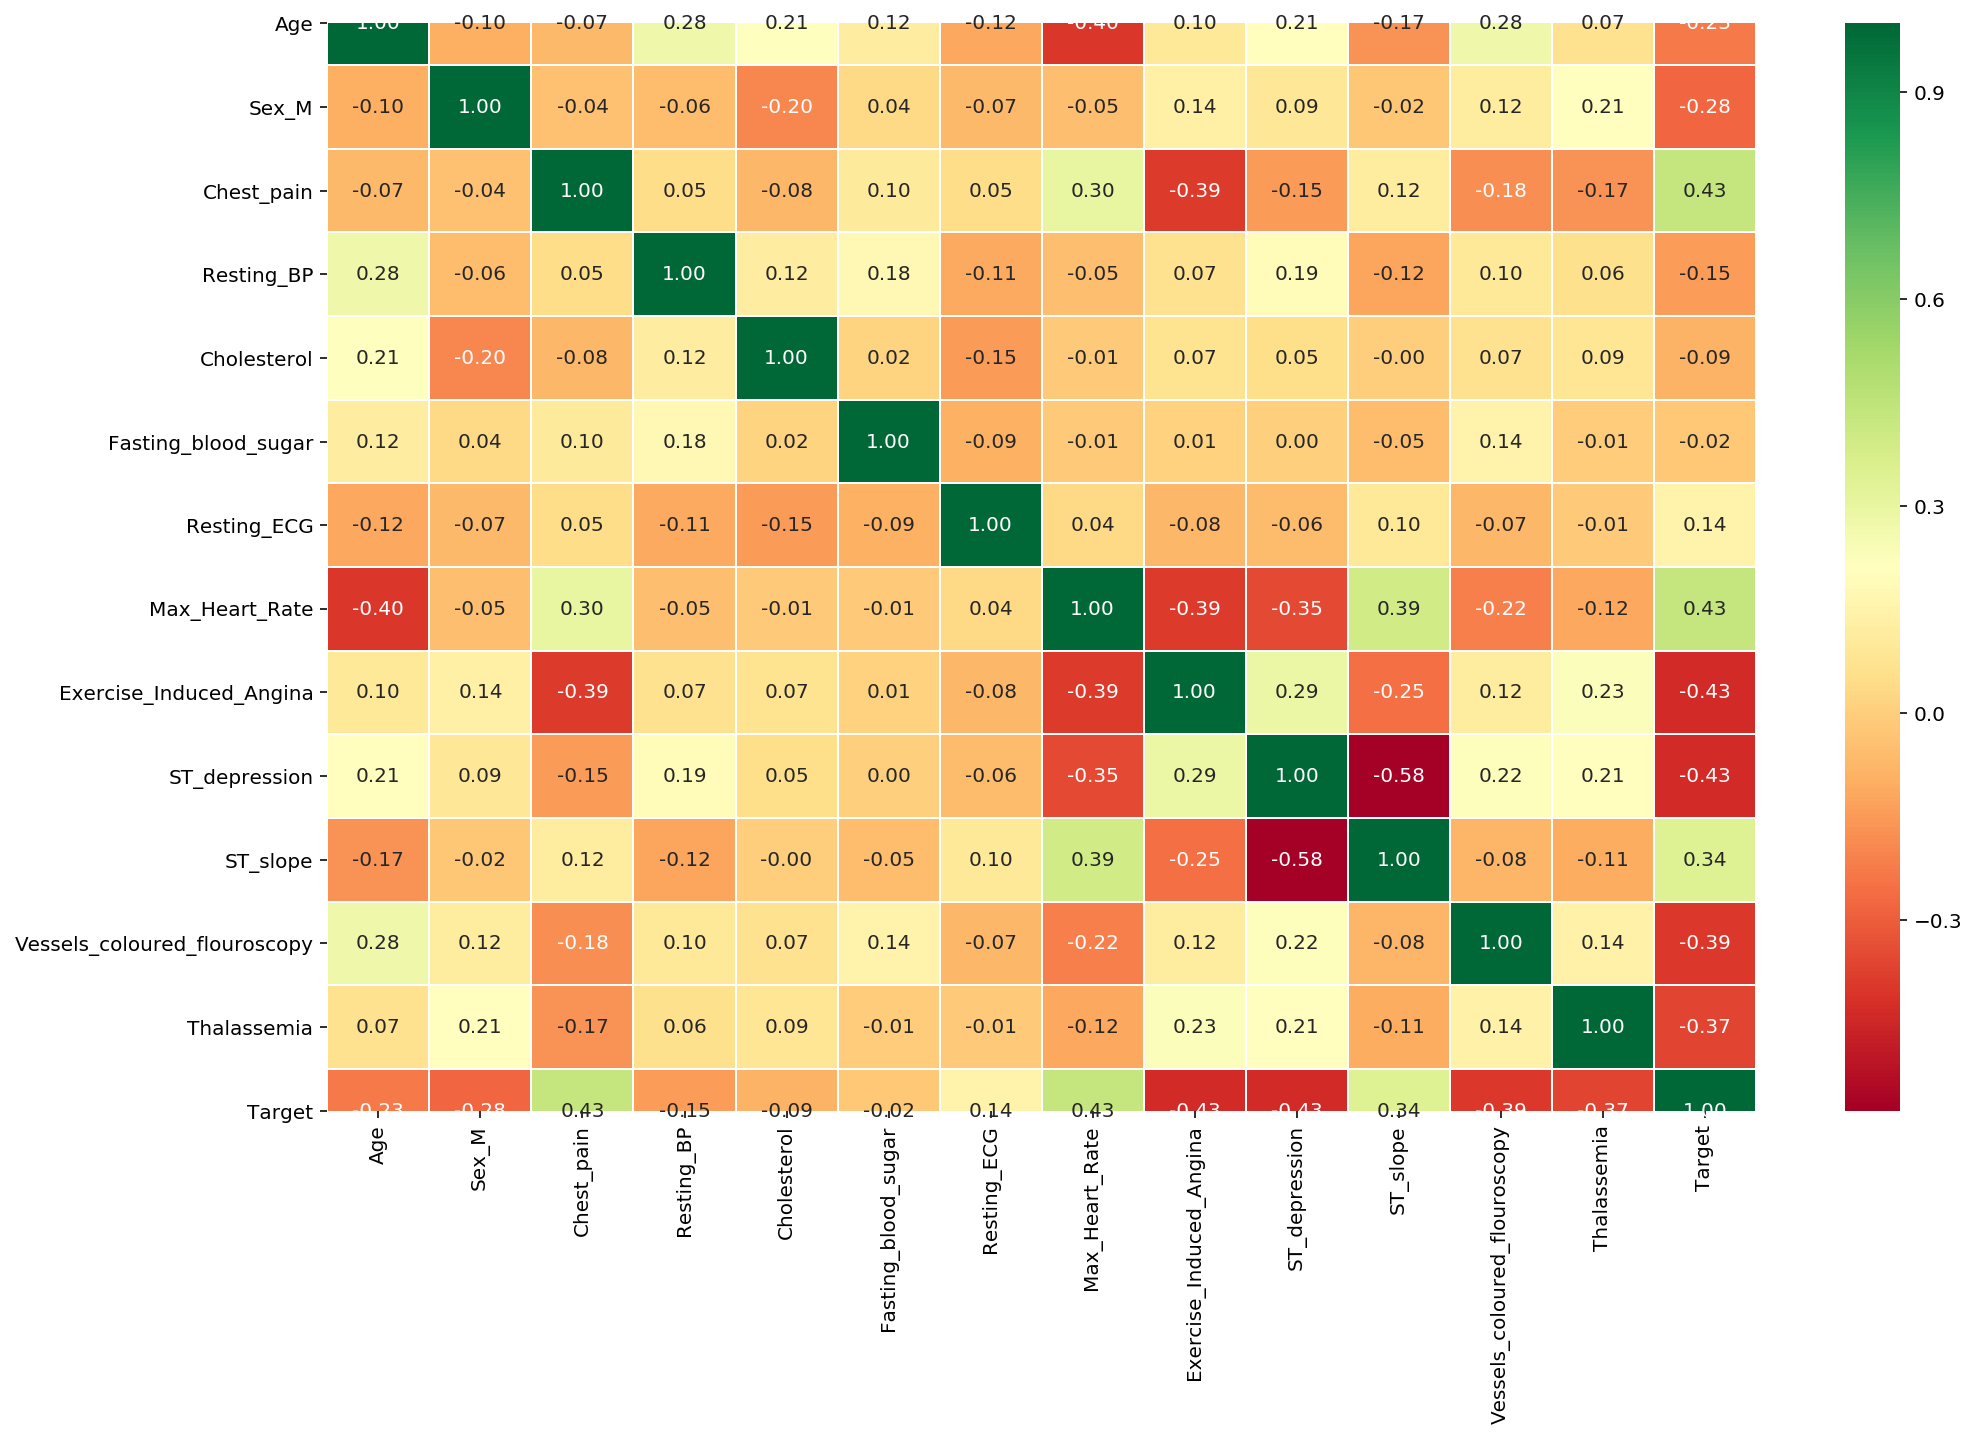

In [106]:
# Correlation using heatmap
f,ax=plt.subplots(figsize=(16,10))
sns.heatmap(heart.corr(),annot=True,cmap='RdYlGn',linewidths=0.5,fmt='.2f',ax=ax)
fig=plt.gcf()
#fig.set_size_inches(20,10)
plt.show()
# from the correlation matrix we can see that with our response variable 'Target', the top five variables which are 
# correlated are:
# Max_Hear_rate: having a correlation of 0.42
# Chest pain: having a correlation of -0.43
# Exercise induced angina: having a correlation of -0.44
# ST depression: having a correlation of -0.43
# Vessels coloured flouroscopy: Having correlation of -0.39

In [107]:
#Functions
def reapplycode(x):#function to display the average in percentage
    return x*100

## Exploratory data analysis

### Univariate analysis 

###### Target (Response variable)

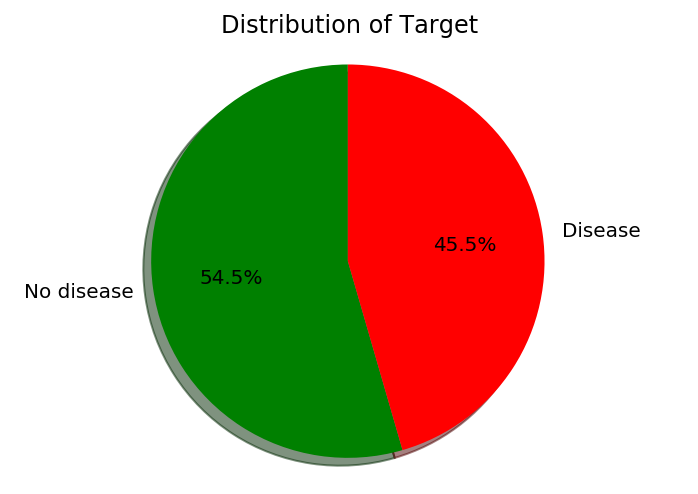

,Number of people,Percentage of disease
No Disease,137,54.49%
Have Disease,164,45.51%


In [108]:
#Graph of number of people with heart disease
labels = "No disease", "Disease"
colors = ['Green','Red']
explode = (0, 0.0)
fig1, ax1 = plt.subplots()
ax1.pie(heart['Target'].value_counts(), colors=colors, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True,startangle=90)
ax1.axis("equal") 
plt.title("Distribution of Target")
plt.show()

#Table to display the average number of people with heart disease and the total number of people in that category
count=heart.groupby('Target').Target.count()
perc_c=pd.DataFrame(count)# creating a dataframe to make it look presentable
heartdis=len(heart[heart['Target']==1])
noheartdis=len(heart[heart['Target']==0])
f_heartdis=(heartdis/(heartdis+noheartdis))
f_noheartdis=(noheartdis/(heartdis+noheartdis))
perc_c['Percentage of disease']=[f_heartdis,f_noheartdis]
perc_c=perc_c.rename(columns={'Target':'Number of people'}) # Renaming the column names
perc_c['Percentage of disease']=perc_c['Percentage of disease'].apply(reapplycode) #Applying the function above to the dataframe
perc_c['Percentage of disease']=perc_c['Percentage of disease'].round(decimals=2) # Rounding the average percentages to two digits
perc_c['Percentage of disease']=perc_c['Percentage of disease'].astype(str)+'%'
perc_c.index=['No Disease','Have Disease']
perc_c
# From this chart we can see that the count of people in the dataset having heart disease are more than those with no heart disease.

### Bivariate analysis

###### In this section , we shall perform bivariate analysis for response variable -Target and each of the categorical variables- sex, chest pain, fasting blood sugar, resting ECG,excercise induced angina, slope, number of major vessels, thalassemia (8 variables)

###### 1) Chest pain vs Target

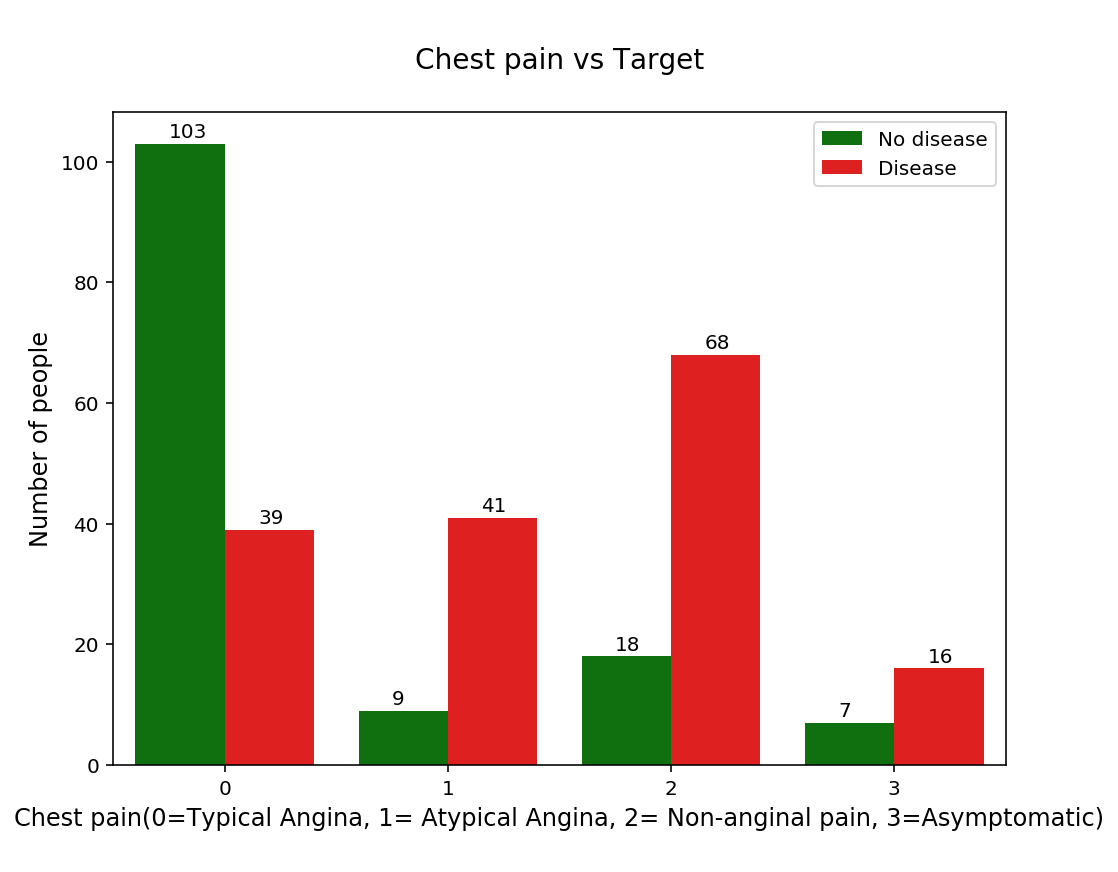

,Average_disease,Count of people
Typical Angina,27.46%,142
Atypical Angina,82.0%,50
Non-anginal pain,79.07%,86
Asymptomatic,69.57%,23


In [109]:
#Q1) How different types of chest pain impacts the probability of target for having heart disease.
ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(x="Chest_pain", hue="Target", data=heart, palette=['Green','Red'])
plt.legend(['No disease','Disease'])
plt.xlabel('Chest pain(0=Typical Angina, 1= Atypical Angina, 2= Non-anginal pain, 3=Asymptomatic)\n',fontsize=12)
plt.ylabel('Number of people',fontsize=12)
plt.title('\nChest pain vs Target\n',fontsize=14)

#For loop to display the count on top of bars in the countplot
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()),(p.get_x()+0.15,p.get_height()+1))
plt.show()

#Table to display the average number of people with heart disease and the total number of people in that category
perc = heart.groupby('Chest_pain').Target.mean()
perc_c = pd.DataFrame(perc)# creating a dataframe to make it look presentable
perc_c['Count of people']=heart.groupby('Chest_pain').Target.count()
perc_c = perc_c.rename(columns={'Target':'Average_disease'}) # Renaming the column names
perc_c['Average_disease'] = perc_c['Average_disease'].apply(reapplycode) #Applying the function above to the dataframe
perc_c['Average_disease'] = perc_c['Average_disease'].round(decimals=2) # Rounding the average percentages to two digits
perc_c['Average_disease'] = perc_c['Average_disease'].astype(str)+'%'
perc_c.index=['Typical Angina','Atypical Angina','Non-anginal pain','Asymptomatic']
perc_c

# People having Atypical angina, Non-anginal pain, Asymptomatic having a higher count for people having heart disease
# as compared to those which do not have.
# As already mentioned above, for Typical angina(0), count for people having heart disease are much lower than with 
# no disease.
#There is good disparity  in avg disease rate between the different types of chest pain.  The number of observations are distribubted well between the four types. Chest pain is a good predictor variable and shall be included in our model.

###### 2) Sex vs Target

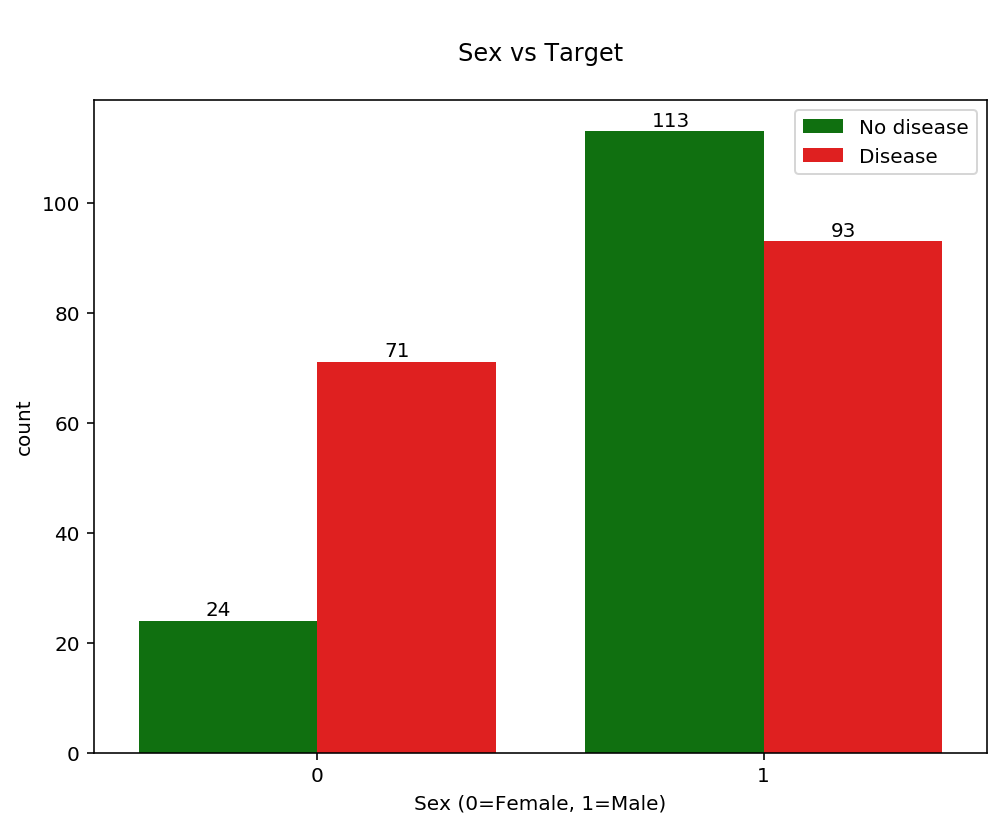

,Average_disease,Count of people
Females,74.74%,95
Males,45.15%,206


In [110]:
tgt = plt.subplots(figsize = (8, 6))
tgt = sns.countplot(x = "Sex_M", hue = "Target", data=heart, palette = ['Green','Red'])
plt.xlabel('Sex (0=Female, 1=Male)')
plt.legend(['No disease','Disease'])
plt.title('\nSex vs Target\n')

for p in tgt.patches:
    tgt.annotate('{}'.format(p.get_height()), (p.get_x() + 0.15,p.get_height() + 1))
plt.show()

#Table to display the average number of people with heart disease and the total number of people in that category
perc = heart.groupby('Sex_M').Target.mean()
perc_c = pd.DataFrame(perc)# creating a dataframe to make it look presentable
perc_c['Count of people'] = heart.groupby('Sex_M').Target.count()
perc_c = perc_c.rename(columns = {'Target':'Average_disease'}) # Renaming the column names
perc_c['Average_disease'] = perc_c['Average_disease'].apply(reapplycode) #Applying the function above to the dataframe
perc_c['Average_disease'] = perc_c['Average_disease'].round(decimals = 2) # Rounding the average percentages to two digits
perc_c['Average_disease'] = perc_c['Average_disease'].astype(str) + '%'
perc_c.index = ['Females','Males']
perc_c

#Though the count of males are more in the dataset, females have a much higher percentage of heart diesase.
#There is good disparity  in avg disease rate between males and females.  The number of observations are distributed well between males and females. Sex is a good predictor variable and shall be included in our model.

###### 3) Fasting_blood_sugar vs Target

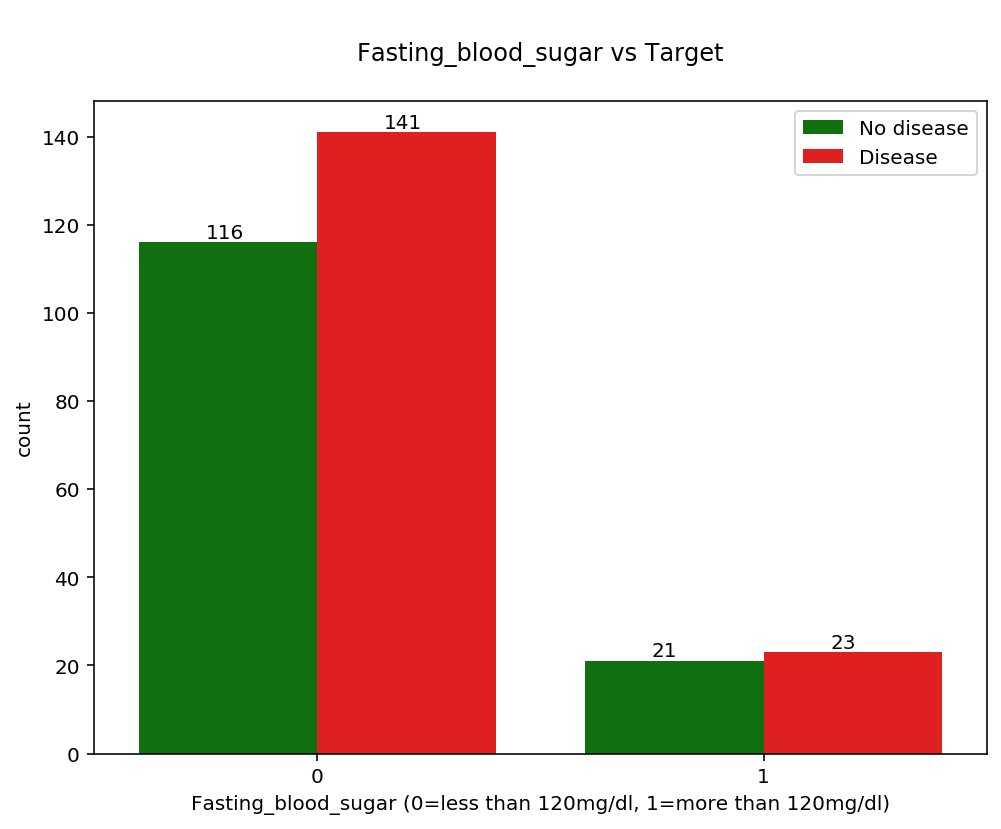

,Average_disease,Count of people
Less than 120mg/dl,54.86%,257
More than 120mg/dl,52.27%,44


In [111]:
tgt = plt.subplots(figsize = (8, 6))
tgt = sns.countplot(x = "Fasting_blood_sugar", hue = "Target", data = heart, palette = ['Green','Red'])
plt.xlabel('Fasting_blood_sugar (0=less than 120mg/dl, 1=more than 120mg/dl)')
plt.legend(['No disease','Disease'])
plt.title('\nFasting_blood_sugar vs Target\n')

for p in tgt.patches:
    tgt.annotate('{}'.format(p.get_height()),(p.get_x()+0.15,p.get_height()+1))
plt.show()

#Table to display the average number of people with heart disease and the total number of people in that category
perc = heart.groupby('Fasting_blood_sugar').Target.mean()
perc_c = pd.DataFrame(perc)# creating a dataframe to make it look presentable
perc_c['Count of people'] = heart.groupby('Fasting_blood_sugar').Target.count()
perc_c = perc_c.rename(columns = {'Target':'Average_disease'}) # Renaming the column names
perc_c['Average_disease'] = perc_c['Average_disease'].apply(reapplycode) #Applying the function above to the dataframe
perc_c['Average_disease'] = perc_c['Average_disease'].round(decimals = 2) # Rounding the average percentages to two digits
perc_c['Average_disease'] = perc_c['Average_disease'].astype(str) + '%'
perc_c.index = ['Less than 120mg/dl','More than 120mg/dl']
perc_c

# People having a normal sugar level are much more in number that those having a higher sugar level
# The reatio of disease vs no disease is higher for people having a lower sugar level
#Fasting flood sugar doesn't seem to help us predict heart disease based on the blood sugar level.  Most of the observations are in the first category.Hence, fasting_blood_sugar is not a good predictor and will not be included in the model.

4) Resting_ECG vs Target

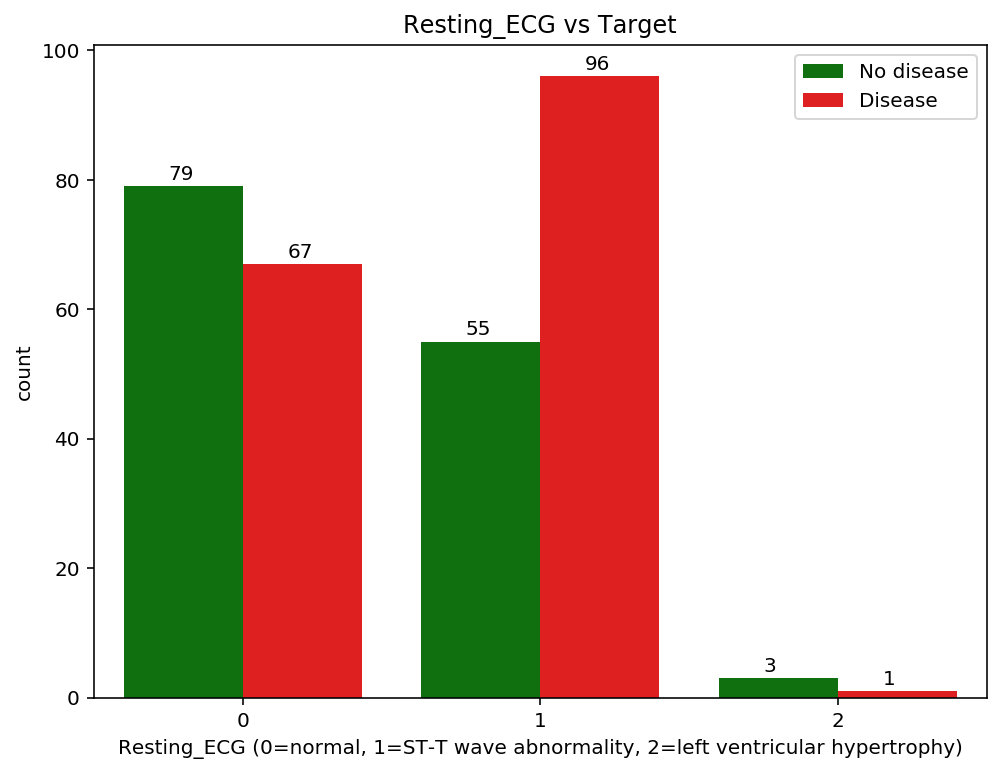

,Average_disease,Count of people
Normal,45.89%,146
ST-T wave abnormality,63.58%,151
Left ventricular hypertrophy,25.0%,4


In [112]:
tgt = plt.subplots(figsize=(8, 6))
tgt = sns.countplot(x="Resting_ECG", hue="Target", data=heart, palette=['Green','Red'])
plt.xlabel('Resting_ECG (0=normal, 1=ST-T wave abnormality, 2=left ventricular hypertrophy)')
plt.legend(['No disease','Disease'])
plt.title('Resting_ECG vs Target')

for p in tgt.patches:
    tgt.annotate('{}'.format(p.get_height()),(p.get_x()+0.15,p.get_height()+1))
plt.show()

#Table to display the average number of people with heart disease and the total number of people in that category
perc=heart.groupby('Resting_ECG').Target.mean()
perc_c=pd.DataFrame(perc)# creating a dataframe to make it look presentable
perc_c['Count of people']=heart.groupby('Resting_ECG').Target.count()
perc_c=perc_c.rename(columns={'Target':'Average_disease'}) # Renaming the column names
perc_c['Average_disease']=perc_c['Average_disease'].apply(reapplycode) #Applying the function above to the dataframe
perc_c['Average_disease']=perc_c['Average_disease'].round(decimals=2) # Rounding the average percentages to two digits
perc_c['Average_disease']=perc_c['Average_disease'].astype(str)+'%'
perc_c.index=['Normal','ST-T wave abnormality','Left ventricular hypertrophy']
perc_c

# People having ST-T wave abnormality have a higher count of diseased individuals as compared to those with no heart disease
#There is good disparity  in avg disease rate between the different types of Resting ECG.However, only 4 observations are present in the last category of Resting_ECG. We shall throw the variable in the standby pile and make a conclusion after analysing all our variables.

###### 5) ST_slope vs Target

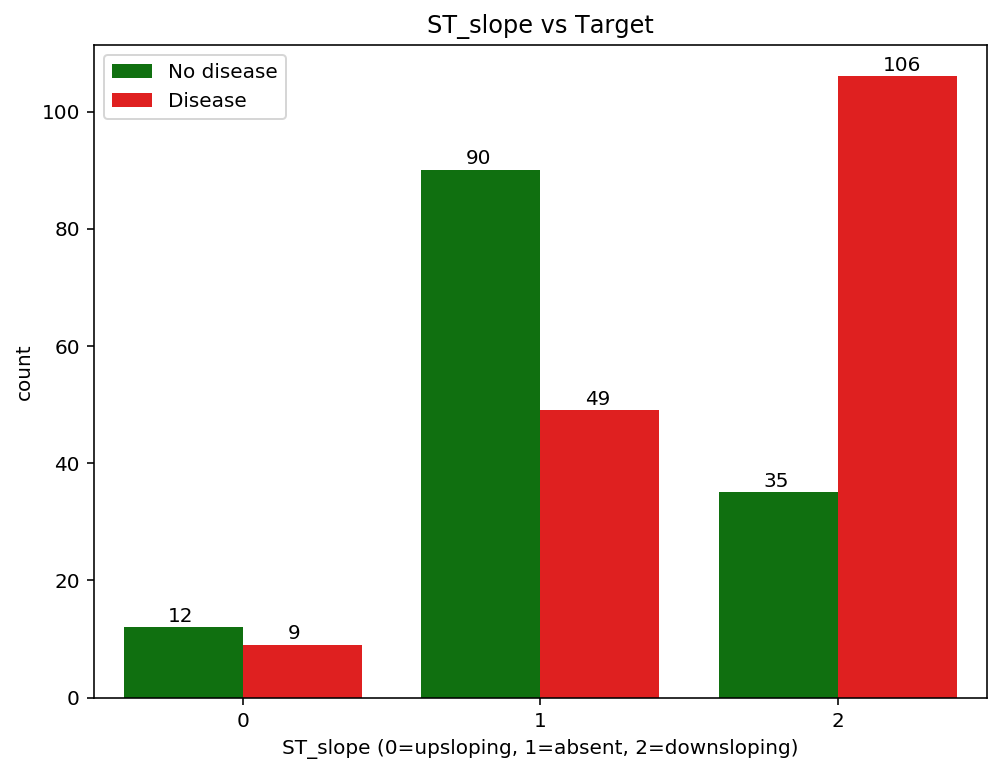

,Average_disease,Count of people
Upsloping,42.86%,21
Absent,35.25%,139
Downsloping,75.18%,141


In [113]:
tgt = plt.subplots(figsize=(8, 6))
tgt = sns.countplot(x="ST_slope", hue="Target", data=heart, palette=['Green','Red'])
plt.xlabel('ST_slope (0=upsloping, 1=absent, 2=downsloping)')
plt.legend(['No disease','Disease'])
plt.title('ST_slope vs Target')

for p in tgt.patches:
    tgt.annotate('{}'.format(p.get_height()),(p.get_x()+0.15,p.get_height()+1))
plt.show()

#Table to display the average number of people with heart disease and the total number of people in that category
perc=heart.groupby('ST_slope').Target.mean()
perc_c=pd.DataFrame(perc)# creating a dataframe to make it look presentable
perc_c['Count of people']=heart.groupby('ST_slope').Target.count()
perc_c=perc_c.rename(columns={'Target':'Average_disease'}) # Renaming the column names
perc_c['Average_disease']=perc_c['Average_disease'].apply(reapplycode) #Applying the function above to the dataframe
perc_c['Average_disease']=perc_c['Average_disease'].round(decimals=2) # Rounding the average percentages to two digits
perc_c['Average_disease']=perc_c['Average_disease'].astype(str)+'%'
perc_c.index=['Upsloping','Absent','Downsloping']
perc_c

# in ECG patients who have a downsloping in ST_slope have a very high count of diseased individuals
# Whereever the ST_slope shows a flat line, in those cases chances for a heart disease are pretty low
#There is good disparity  in avg disease rate between the different types of ST_Slope.  The number of observations are distributed reasonably well between the three types. ST_slopes is a good predictor variable and shall be included in our model.

###### 6) Thalassemia vs Target

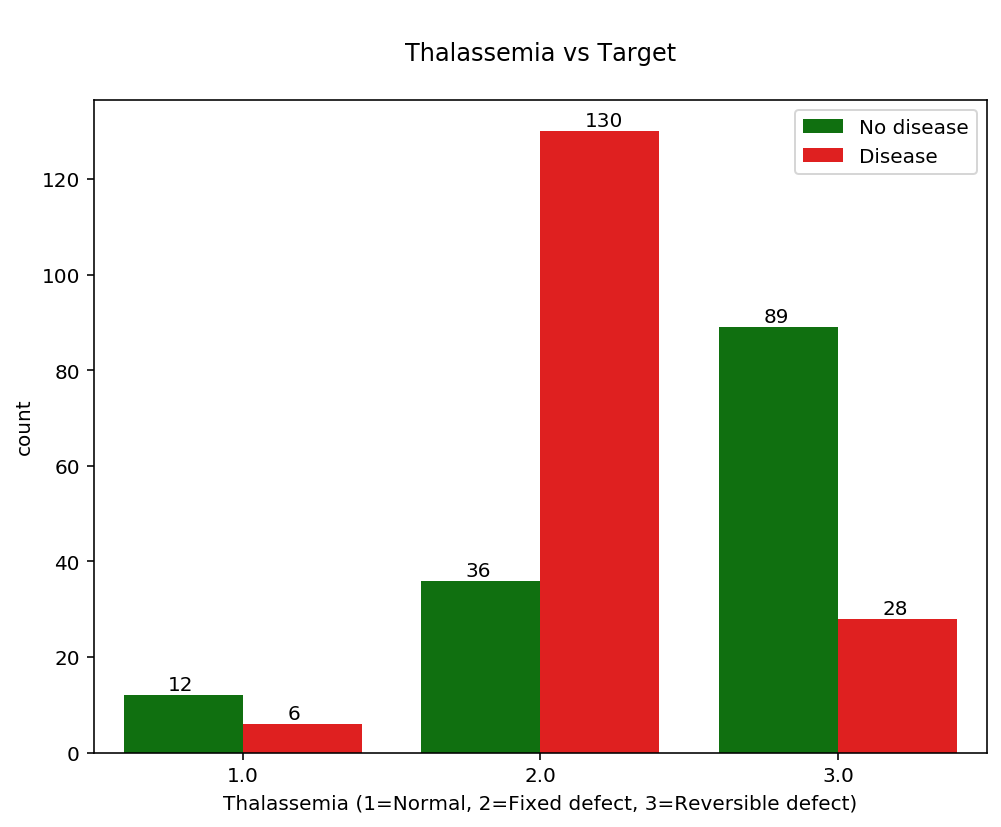

,Average_disease,Count of people
Normal,33.33%,18
Fixed defect,78.31%,166
Reversible defect,23.93%,117


In [140]:
tgt = plt.subplots(figsize=(8, 6))
tgt = sns.countplot(x="Thalassemia", hue="Target", data=heart, palette=['Green','Red'])
plt.xlabel('Thalassemia (1=Normal, 2=Fixed defect, 3=Reversible defect)')
plt.legend(['No disease','Disease'])
plt.title('\nThalassemia vs Target\n')

for p in tgt.patches:
    tgt.annotate('{}'.format(p.get_height()),(p.get_x()+0.15,p.get_height()+1))
plt.show()

#Table to display the average number of people with heart disease and the total number of people in that category
perc=heart.groupby('Thalassemia').Target.mean()
perc_c=pd.DataFrame(perc)# creating a dataframe to make it look presentable
perc_c['Count of people']=heart.groupby('Thalassemia').Target.count()
perc_c=perc_c.rename(columns={'Target':'Average_disease'}) # Renaming the column names
perc_c['Average_disease']=perc_c['Average_disease'].apply(reapplycode) #Applying the function above to the dataframe
perc_c['Average_disease']=perc_c['Average_disease'].round(decimals=2) # Rounding the average percentages to two digits
perc_c['Average_disease']=perc_c['Average_disease'].astype(str)+'%'
perc_c.index=['Normal','Fixed defect','Reversible defect']
perc_c

# Patients having a fixed defect are at a very high risk of having heart disease as compared to those with reversible defect
#There is good disparity  in avg disease rate between the different types of Thalassemia.However, only 18 observations are present in the first category of Thalassemia. We shall throw the variable in the standby pile and make a conclusion after analysing all our variables.

###### 7) Vessels coloured fluoroscopy vs Target

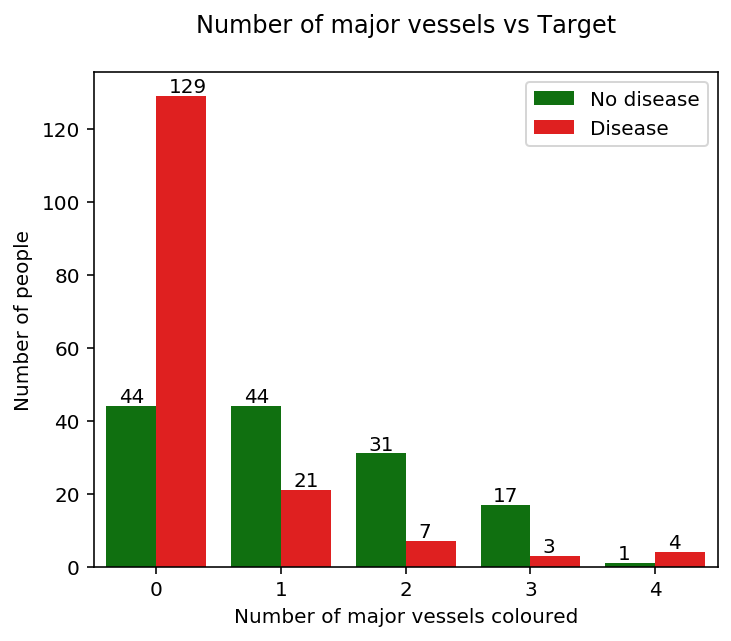

,Average_disease,Count of people
Vessels_coloured_flouroscopy,,
0,74.57%,173
1,32.31%,65
2,18.42%,38
3,15.0%,20
4,80.0%,5


In [115]:
fig,ax=plt.subplots(figsize=(19,10))
plt.subplot(231)
s7=sns.countplot(x='Vessels_coloured_flouroscopy',data=heart,hue='Target',palette=('Green','Red'),linewidth=3)
s7.set_title('Number of major vessels vs Target\n')
plt.legend(['No disease','Disease'])
plt.xlabel('Number of major vessels coloured')
plt.ylabel('Number of people')

#For loop to display the count on top of bars in the countplot
for p in s7.patches:
    s7.annotate('{}'.format(p.get_height()),(p.get_x()+0.10,p.get_height()+1))
plt.show()

#Table to display the average number of people with heart disease and the total number of people in that category
perc=heart.groupby('Vessels_coloured_flouroscopy').Target.mean()
perc_c=pd.DataFrame(perc)# creating a dataframe to make it look presentable
perc_c['Count of people']=heart.groupby('Vessels_coloured_flouroscopy').Target.count()
perc_c=perc_c.rename(columns={'Target':'Average_disease'}) # Renaming the column names
perc_c['Average_disease']=perc_c['Average_disease'].apply(reapplycode) #Applying the function above to the dataframe
perc_c['Average_disease']=perc_c['Average_disease'].round(decimals=2) # Rounding the average percentages to two digits
perc_c['Average_disease']=perc_c['Average_disease'].astype(str)+'%'
perc_c
##There is good disparity  in avg disease rate between the different types of number of major vessels variable.  The number of observations are distribubted well between the five types. Number of major vessels is a good predictor variable and shall be included in our model.

###### 8) Excercise induced angina vs Target

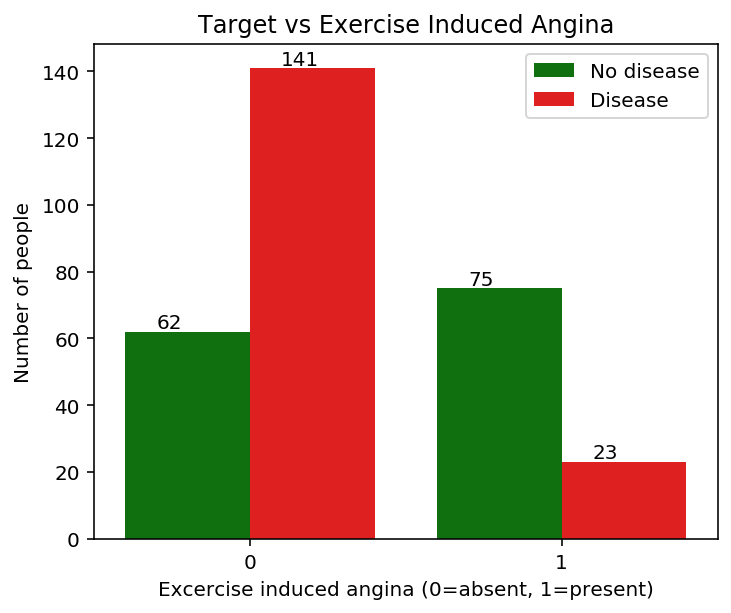

,Average_disease,Count of people
Angina,69.46%,203
No angina,23.47%,98


In [116]:
fig,ax=plt.subplots(figsize=(19,10))
plt.subplot(231)
s7=sns.countplot(x='Exercise_Induced_Angina',data=heart,hue='Target',palette=('Green','Red'),linewidth=3)
s7.set_title('Target vs Exercise Induced Angina')
plt.legend(['No disease','Disease'])
plt.xlabel('Excercise induced angina (0=absent, 1=present)')
plt.ylabel('Number of people')

#For loop to display the count on top of bars in the countplot
for p in s7.patches:
    s7.annotate('{}'.format(p.get_height()),(p.get_x()+0.10,p.get_height()+1))
plt.show()

#Table to display the average number of people with heart disease and the total number of people in that category
perc=heart.groupby('Exercise_Induced_Angina').Target.mean()
perc_c=pd.DataFrame(perc)# creating a dataframe to make it look presentable
perc_c['Count of people']=heart.groupby('Exercise_Induced_Angina').Target.count()
perc_c=perc_c.rename(columns={'Target':'Average_disease'}) # Renaming the column names
perc_c['Average_disease']=perc_c['Average_disease'].apply(reapplycode) #Applying the function above to the dataframe
perc_c['Average_disease']=perc_c['Average_disease'].round(decimals=2) # Rounding the average percentages to two digits
perc_c['Average_disease']=perc_c['Average_disease'].astype(str)+'%'
perc_c.index=['Angina','No angina']
perc_c

# Patients having angina due to exercise have a higher chance of having a heart disease as compared to those who do not have angina
#There is good disparity  in avg disease rate between the presence and absence of angina.However, most observations are for presence of angina and only a few for absence of angina. We shall throw the variable in the standby pile and make a conclusion after analysing all our variables.

###### In this section , we shall perform bivariate analysis for response variable -Target and each of the numerical variables-age, resting blood pressure, cholesterol, Maximum heart rate, ST depression (5 variables)

###### 1) Maximum heart rate vs Target

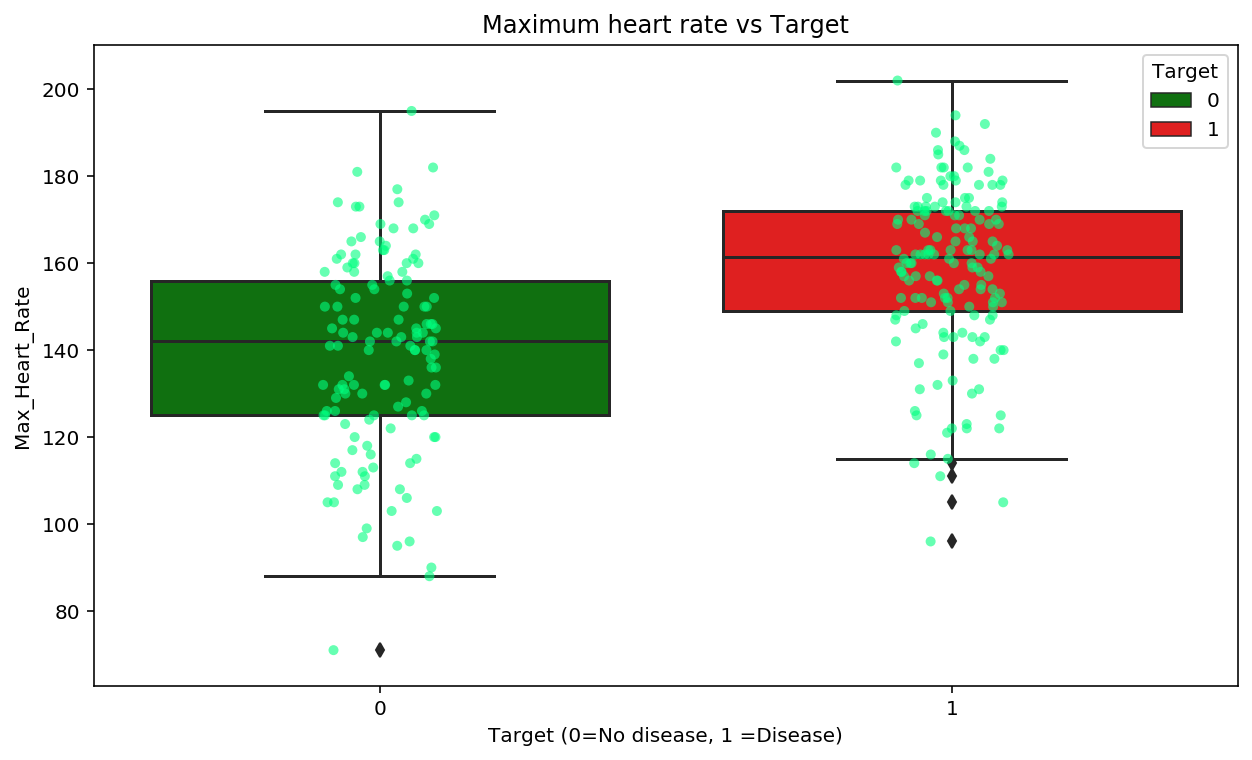

In [117]:
fig,ax=plt.subplots(figsize=(25,10))
plt.subplot(231)
s7=sns.boxplot(x='Target',y='Max_Heart_Rate',data=heart,hue='Target',palette=('Green','Red'),dodge=False)
s7=sns.stripplot(y='Max_Heart_Rate', x='Target',data=heart, marker='o',color="springgreen",alpha=0.6)
s7.set_title('Maximum heart rate vs Target')
s7.set_xlabel('Target (0=No disease, 1 =Disease)')
plt.tight_layout()
plt.show()

# Patients having a heart disease have a more 'maximum heart rate' as compared to those who do not have heart disease.
# This variable shows some correlation with the response variable

In [118]:
low=heart[(heart['Max_Heart_Rate']<=120)]
middle=heart[(heart['Max_Heart_Rate']>121) & (heart['Max_Heart_Rate']<=170)]
high=heart[(heart['Max_Heart_Rate']>170)]
hlow=low[low['Target']==1]
hmid=middle[middle['Target']==1]
hhigh=high[high['Target']==1]
lol=len(low)
lom=len(middle)
loh=len(high)
poy=len(hlow)/len(low)*100
pom=len(hmid)/len(middle)*100
poo=len(hhigh)/len(high)*100
dat=pd.DataFrame(data=[[poy,lol],[pom,lom],[poo,loh]],index=['Low heart rate','Medium heart rate','High heart rate'],columns=['Percentage of disease','Number of people'])
dat['Percentage of disease']=dat['Percentage of disease'].round(decimals=2) # Rounding the average percentages to two digits
dat


,Percentage of disease,Number of people
Low heart rate,16.67,36
Medium heart rate,52.43,206
High heart rate,84.48,58


<Figure size 432x288 with 0 Axes>

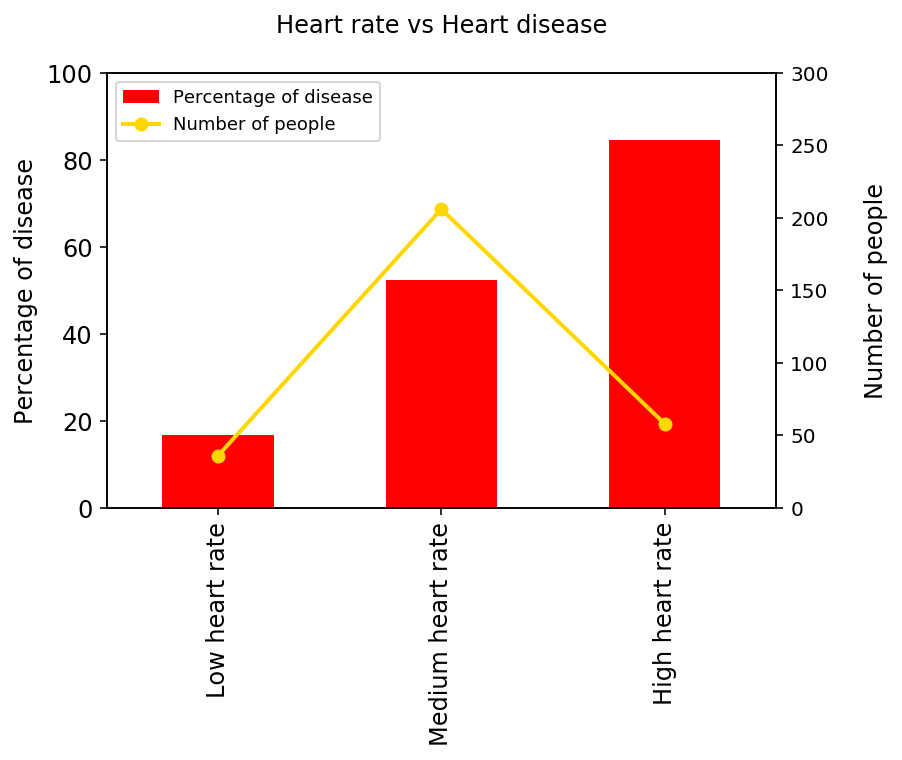

In [119]:
fig = plt.figure()
ax = dat[['Percentage of disease']].plot(kind='bar', use_index=True,color='Red',fontsize=12,legend=False)
ax2 = ax.twinx()
ax2.plot(ax.get_xticks(),dat[['Number of people']].values, linestyle='-', marker='o', linewidth=2.0,color='gold',label="Number of people")
ax.set_ylim((0, 100))
ax2.set_ylim((0,300))
ax.set_title('Heart rate vs Heart disease\n',fontsize=12)
ax.set_ylabel("Percentage of disease",fontsize=12)
ax2.set_ylabel("\nNumber of people",fontsize=12)
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc="upper left",fontsize=9)
# The graph below shows that people with high heart rate have a higher chance of heart disease. It shows a clear pattern of- as the heart rate increases ,the chances of heart diseases increases.However, most of the observations are in the middle range. We shall throw the variable in the standby pile and make a conclusion after analysing all our variables.

###### 2) Age vs Target

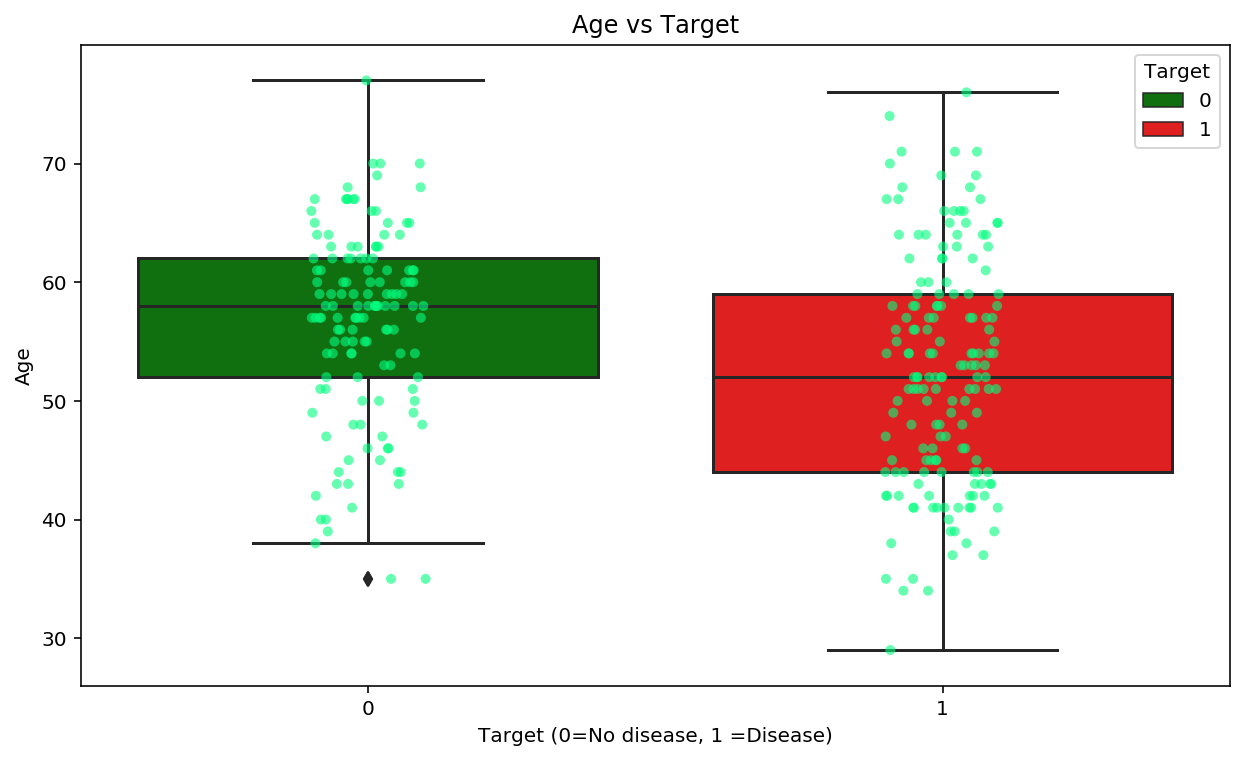

In [120]:
fig,ax=plt.subplots(figsize=(25,10))
plt.subplot(231)
s7=sns.boxplot(x='Target',y='Age',data=heart,hue='Target',palette=('Green','Red'),dodge=False)
s7=sns.stripplot(y='Age', x='Target',data=heart, marker='o',color="springgreen",alpha=0.6)
s7.set_title('Age vs Target')
s7.set_xlabel('Target (0=No disease, 1 =Disease)')
plt.tight_layout()
plt.show()

# Age for patients who suffer from heart disease is mostly between 45-60 i.e. as per the dataset, middle aged people have a higher chance of heart disease

In [121]:
young=heart[(heart['Age']<=35)]
middle=heart[(heart['Age']>36) & (heart['Age']<55)]
old=heart[(heart['Age']>55)]
hyoung=young[young['Target']==1]
hmid=middle[middle['Target']==1]
hold=old[old['Target']==1]
loy=len(young)
lom=len(middle)
loo=len(old)
poy=len(hyoung)/len(young)*100
pom=len(hmid)/len(middle)*100
poo=len(hold)/len(old)*100
dat=pd.DataFrame(data=[[poy,loy],[pom,lom],[poo,loo]],index=['Young people','Middle people','Old people'],columns=['Percentage of disease','Number of people'])
dat['Percentage of disease']=dat['Percentage of disease'].round(decimals=2) # Rounding the average percentages to two digits
dat

,Percentage of disease,Number of people
Young people,71.43,7
Middle people,69.63,135
Old people,41.06,151


<Figure size 432x288 with 0 Axes>

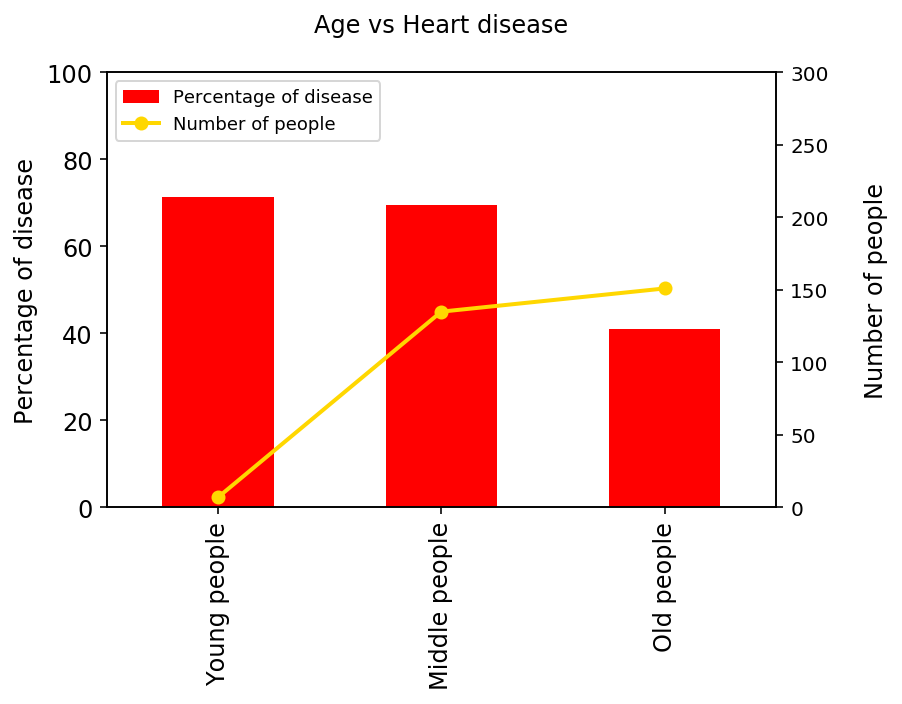

In [122]:
fig = plt.figure()
ax = dat[['Percentage of disease']].plot(kind='bar', use_index=True,color='Red',fontsize=12,legend=False)
ax2 = ax.twinx()
ax2.plot(ax.get_xticks(),dat[['Number of people']].values, linestyle='-', marker='o', linewidth=2.0,color='gold',label="Number of people")
ax.set_ylim((0, 100))
ax2.set_ylim((0,300))
ax.set_title('Age vs Heart disease\n',fontsize=12)
ax.set_ylabel("Percentage of disease",fontsize=12)
ax2.set_ylabel("\nNumber of people",fontsize=12)
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc="upper left",fontsize=9)

# We have distrbuted the individuals into three segments based on the age i.e. young middle and old and the below
# details shows the count of individuals in each age group.
# This seems quite strange but as per the data, out of total 7 people in young age group below 35,
# 71.43 percent of them have heart disease. This is the maximum among all the three groups created above.
# The graph below shows that younger people have a higher chance of heart diseases than older people, but there are just 7 young people.This variable is misleading and we shall not consider it for modelling.

###### 3) Resting_BP vs Target

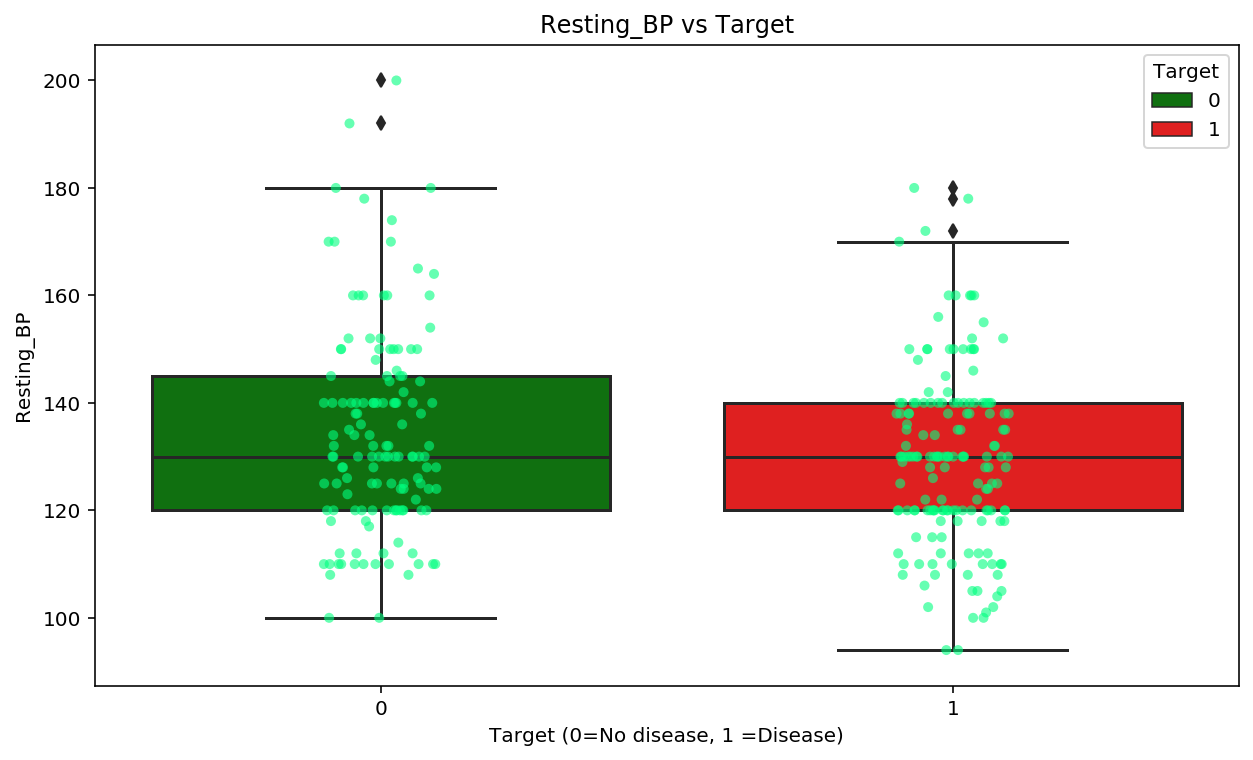

In [123]:
fig,ax=plt.subplots(figsize=(25,10))
plt.subplot(231)
s7=sns.boxplot(x='Target',y='Resting_BP',data=heart,hue='Target',palette=('Green','Red'),dodge=False)
s7=sns.stripplot(y='Resting_BP', x='Target',data=heart, marker='o',color="springgreen",alpha=0.6)
s7.set_title('Resting_BP vs Target')
s7.set_xlabel('Target (0=No disease, 1 =Disease)')
plt.tight_layout()
plt.show()

# We cannot differentiate easily from as to which level of resting_BP has a more impact on the response variable

###### 4) Cholesterol vs Target

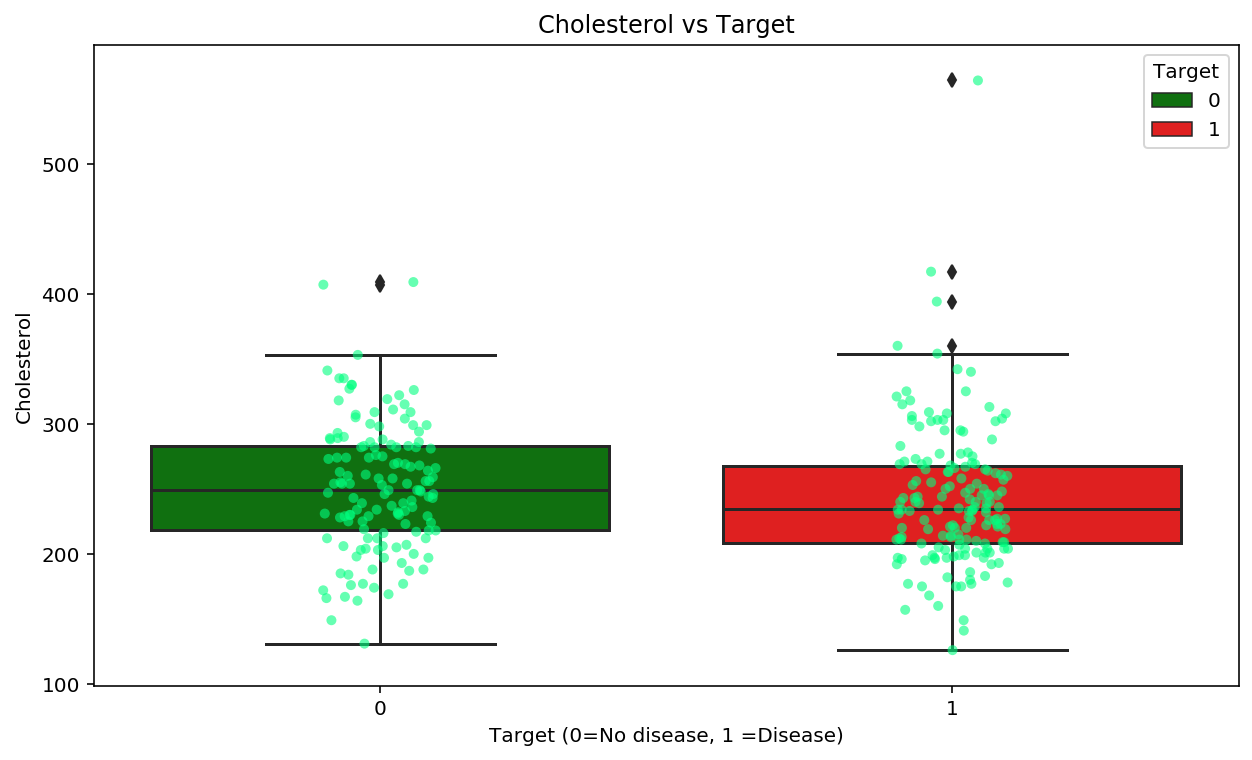

In [124]:
fig,ax=plt.subplots(figsize=(25,10))
plt.subplot(231)
s7=sns.boxplot(x='Target',y='Cholesterol',data=heart,hue='Target',palette=('Green','Red'),dodge=False)
s7=sns.stripplot(y='Cholesterol', x='Target',data=heart, marker='o',color="springgreen",alpha=0.6)
s7.set_title('Cholesterol vs Target')
s7.set_xlabel('Target (0=No disease, 1 =Disease)')
plt.tight_layout()
plt.show()

# Cholesterol level does not show any clear relationship with the response variable

In [125]:
young=heart[(heart['Cholesterol']<=160)]
middle=heart[(heart['Cholesterol']>160) & (heart['Cholesterol']<279)]
old=heart[(heart['Cholesterol']>280)]
hyoung=young[young['Target']==1]
hmid=middle[middle['Target']==1]
hold=old[old['Target']==1]
loy=len(young)
lom=len(middle)
loo=len(old)
poy=len(hyoung)/len(young)*100
pom=len(hmid)/len(middle)*100
poo=len(hold)/len(old)*100
dat=pd.DataFrame(data=[[poy,loy],[pom,lom],[poo,loo]],index=['Normal Cholesterol','Mildly High Cholesterol','High Cholesterol'],columns=['Percentage of disease','Number of people'])
dat['Percentage of disease']=dat['Percentage of disease'].round(decimals=2) # Rounding the average percentages to two digits
dat

,Percentage of disease,Number of people
Normal Cholesterol,71.43,7
Mildly High Cholesterol,58.04,224
High Cholesterol,41.43,70


<Figure size 432x288 with 0 Axes>

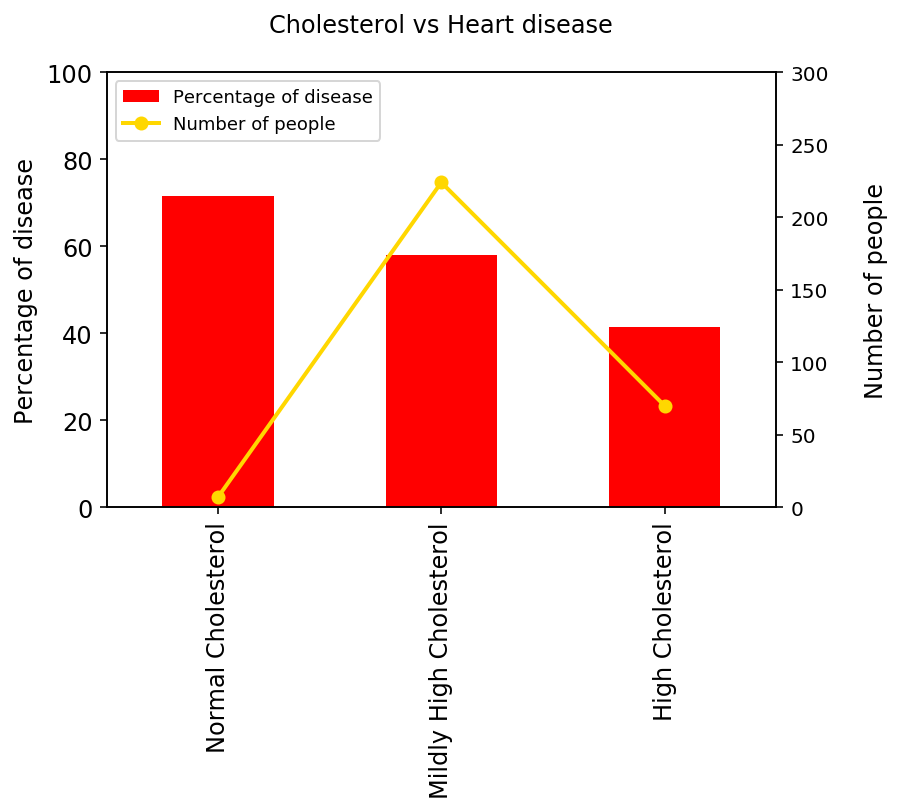

In [126]:
fig = plt.figure()
ax = dat[['Percentage of disease']].plot(kind='bar', use_index=True,color='Red',fontsize=12,legend=False)
ax2 = ax.twinx()
ax2.plot(ax.get_xticks(),dat[['Number of people']].values, linestyle='-', marker='o', linewidth=2.0,color='gold',label="Number of people")
ax.set_ylim((0, 100))
ax2.set_ylim((0,300))
ax.set_title('Cholesterol vs Heart disease\n',fontsize=12)
ax.set_ylabel("Percentage of disease",fontsize=12)
ax2.set_ylabel("\nNumber of people",fontsize=12)
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc="upper left",fontsize=9)
# The graph below shows that younger people have a higher chance of heart diseases than older people, but most of observations are distributed to the "Midly high"  range cholesterol.Cholesterol is not a good predictor and we shall not consider it for modelling.

###### 5) ST_depression vs heart disease

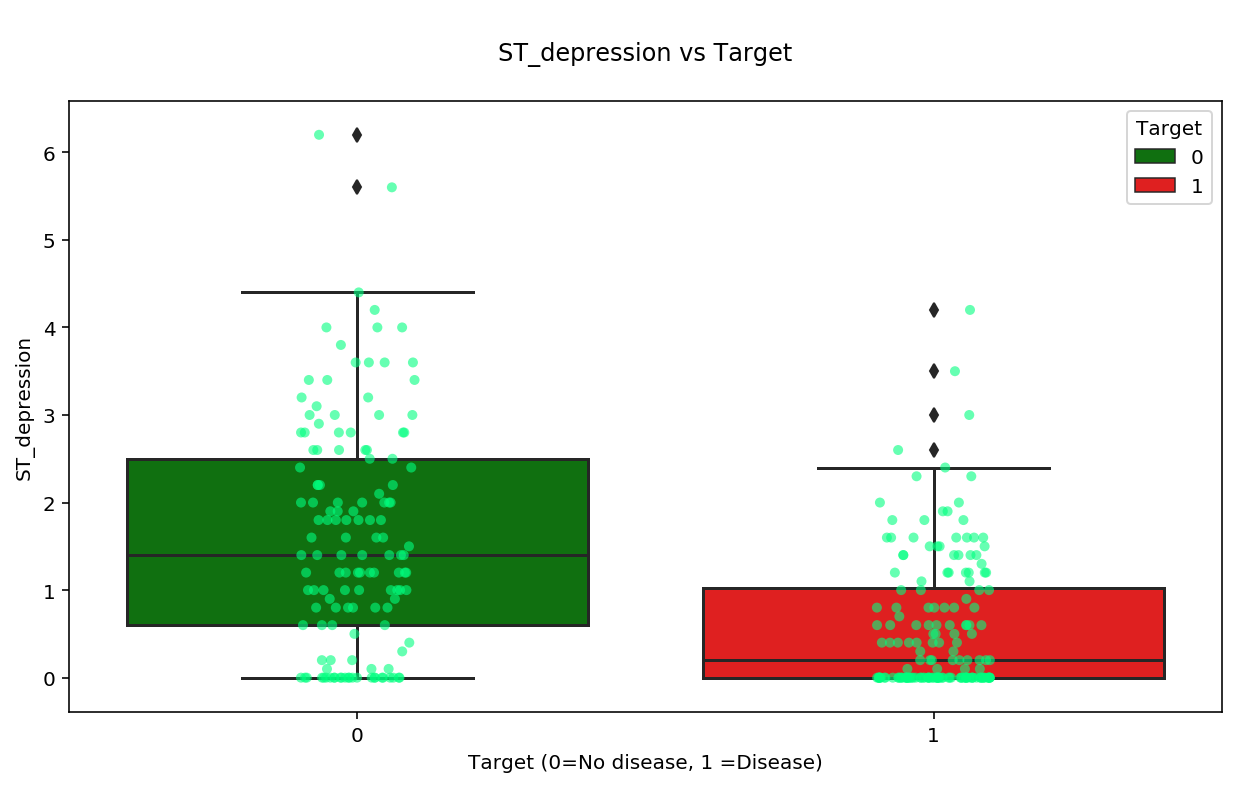

In [127]:
fig,ax=plt.subplots(figsize=(25,10))
plt.subplot(231)
s7=sns.boxplot(x='Target',y='ST_depression',data=heart,hue='Target',palette=('Green','Red'),dodge=False)
#s7.legend(['No diease','Disease'])
s7=sns.stripplot(y='ST_depression', x='Target',data=heart, marker='o',color="springgreen",alpha=0.6)
s7.set_title('\nST_depression vs Target\n')
s7.set_xlabel('Target (0=No disease, 1 =Disease)')
plt.tight_layout()
plt.show()

#

In [128]:
fatal=heart[(heart['ST_depression']<=0.15)]
mild=heart[(heart['ST_depression']>0.15) & (heart['ST_depression']<2.5)]
normal=heart[(heart['ST_depression']>=2.5)]
hfatal=fatal[fatal['Target']==1]
hmild=mild[mild['Target']==1]
hnormal=normal[normal['Target']==1]
lon=len(normal)
lom=len(mild)
lof=len(fatal)
pon=len(hnormal)/len(normal)*100
pom=len(hmild)/len(mild)*100
pof=len(hfatal)/len(fatal)*100
dat=pd.DataFrame(data=[[pon,lon],[pom,lom],[pof,lof]],index=['Normal ST','Mild ST','Fatal ST'],columns=['Percentage of disease','Number of people'])
dat['Percentage of disease']=dat['Percentage of disease'].round(decimals=2) # Rounding the average percentages to two digits
#dat['Percentage of disease']=dat['Percentage of disease'].astype(str)+'%'
dat

,Percentage of disease,Number of people
Normal ST,10.00,40
Mild ST,53.21,156
Fatal ST,73.33,105


<Figure size 432x288 with 0 Axes>

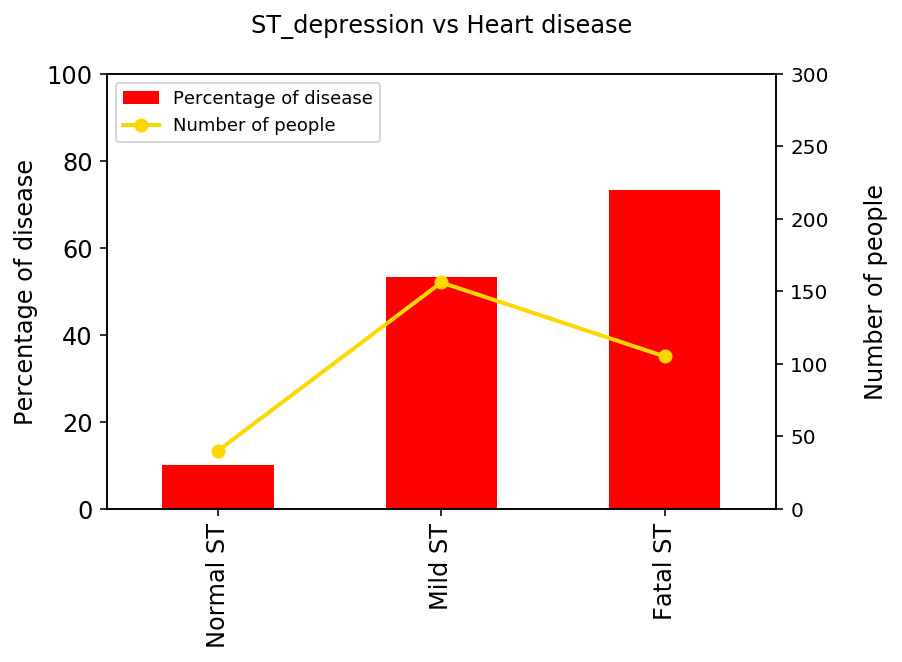

In [129]:
fig = plt.figure()
ax = dat[['Percentage of disease']].plot(kind='bar', use_index=True,color='Red',fontsize=12,legend=False)
ax2 = ax.twinx()
ax2.plot(ax.get_xticks(),dat[['Number of people']].values, linestyle='-', marker='o', linewidth=2.0,color='gold',label="Number of people")
ax.set_ylim((0, 100))
ax2.set_ylim((0,300))
ax.set_title('ST_depression vs Heart disease\n',fontsize=12)
ax.set_ylabel("Percentage of disease",fontsize=12)
ax2.set_ylabel("\nNumber of people",fontsize=12)
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc="upper left",fontsize=9)
# The graph below shows that people with high ST_depression have a higher chance of heart disease. It shows a clear pattern of- as the ST depression rate increases ,the chances of heart diseases increases.The observations are reasonably distributed between the three ranges.Hence, ST depression is a good predictor and we shall use it for modelling

In [146]:
prelim_tab=pd.DataFrame(columns=['Good','Bad','Maybe'],data=[[1,'Cholesterol','Maximum heart rate'],['Sex','Age',4],['Resting_BP',3,5],['ST_depression']])
prelim_tab

,Good,Bad,Maybe
0,1,Cholesterol,Maximum heart rate
1,Sex,Age,4
2,Resting_BP,3,5
3,ST_depression,None,None


##### In this case , we shall perform analysis for three or more variables 

### Multivariate analysis


Maximum heart rate vs ST_slope vs Target

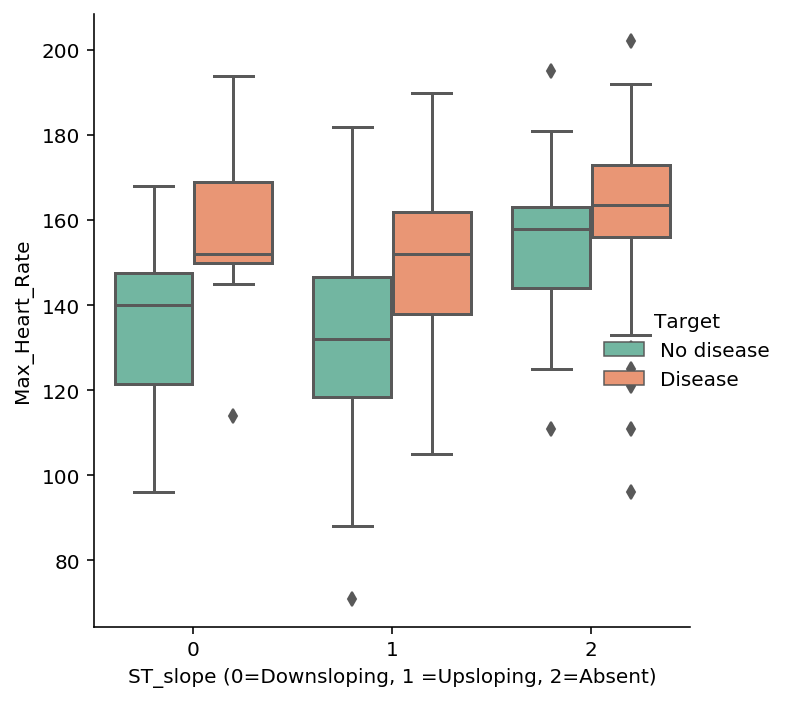

In [130]:
g=sns.catplot(x="ST_slope", y="Max_Heart_Rate", hue="Target", kind="box", data=heart, palette="Set2")
plt.xlabel('ST_slope (0=Downsloping, 1 =Upsloping, 2=Absent)')
new_labels = ['No disease', 'Disease']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)
# we can see that people having max haeart rate in range 150-170 and with downsloping have higher chance of having a heart disease
# same can be seen for upsloping

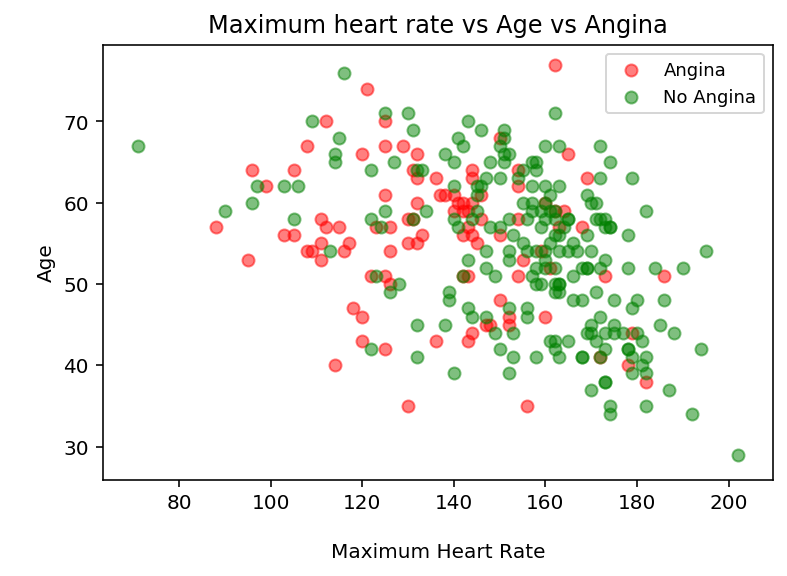

In [131]:
plt.scatter(x=heart.Max_Heart_Rate[heart.Exercise_Induced_Angina==1], y=heart.Age[(heart.Exercise_Induced_Angina==1)],alpha=0.5, c="Red")
plt.scatter(x=heart.Max_Heart_Rate[heart.Exercise_Induced_Angina==0], y=heart.Age[(heart.Exercise_Induced_Angina==0)],alpha=0.5, c="Green")
plt.legend(["Angina", "No Angina"],fontsize=9)
plt.xlabel("\nMaximum Heart Rate")
plt.ylabel("\nAge")
plt.title("Maximum heart rate vs Age vs Angina")
plt.show()
#We observe that people in age group 45-60 and within max heart rate range 145-185 have no angina.

[]

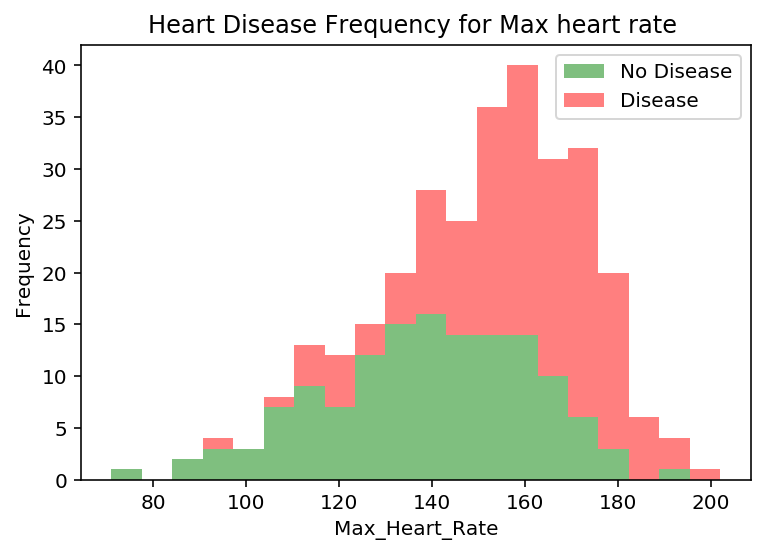

In [132]:
import matplotlib.pyplot as plt
plt.hist([heart.Max_Heart_Rate[heart.Target==0], heart.Max_Heart_Rate[heart.Target==1]], bins=20,color=['green', 'red'],alpha=0.5, stacked=True)
plt.legend(["No Disease", "Disease"])
plt.title('Heart Disease Frequency for Max heart rate ')
plt.xlabel('Max_Heart_Rate')
plt.ylabel('Frequency')
plt.plot()
#We observe that people with high max heart rate are more vulnarable to having a heart disease

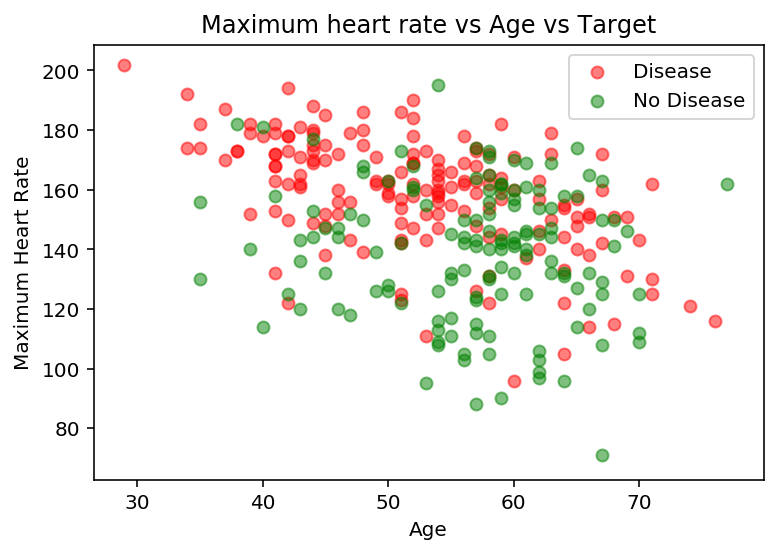

In [133]:
plt.scatter(x=heart.Age[heart.Target==1], y=heart.Max_Heart_Rate[(heart.Target==1)],alpha=0.5, c="Red")
plt.scatter(x=heart.Age[heart.Target==0], y=heart.Max_Heart_Rate[(heart.Target==0)],alpha=0.5, c="Green")
plt.legend(["Disease", "No Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.title("Maximum heart rate vs Age vs Target")
plt.show()
# As the age is increasing the max heart rate is decreasing but the major population of diseased individuals is for middle aged people having a higher heart rate

Text(0.5, 1, 'Max_Heart_Rate vs Age vs Resting_BP vs Target')

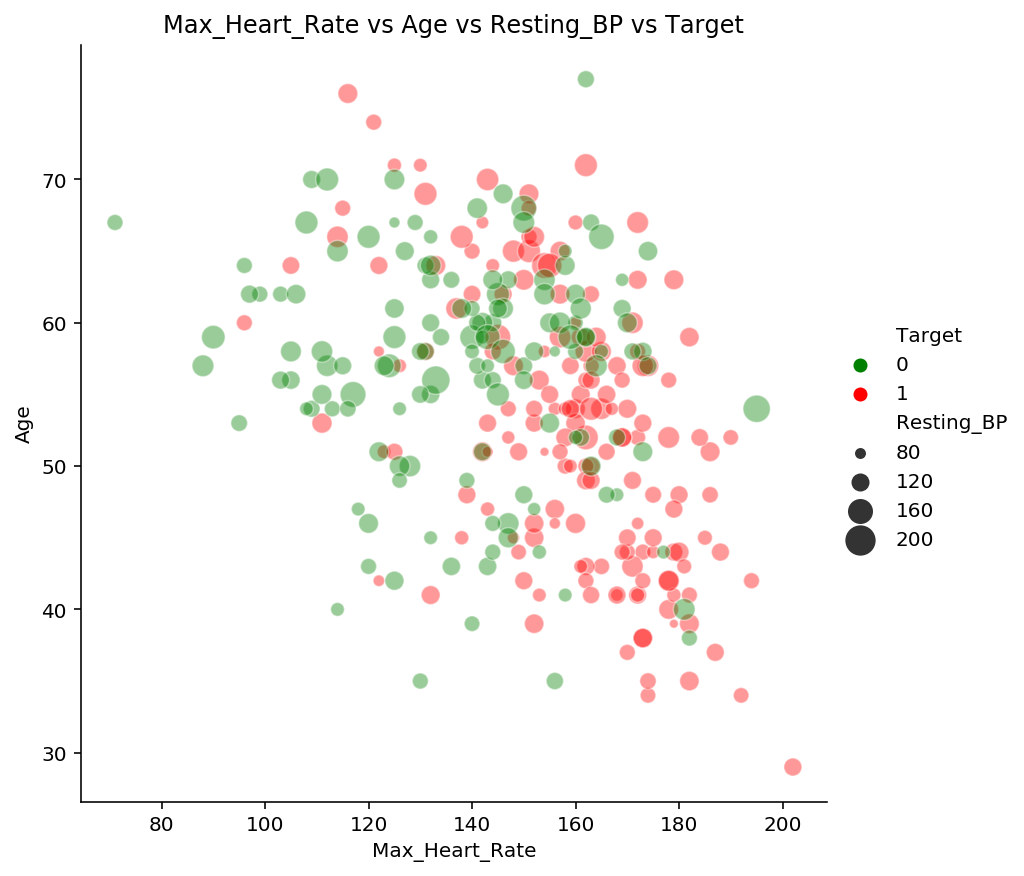

In [134]:
sns.relplot(x="Max_Heart_Rate", y="Age", hue="Target",size="Resting_BP",sizes=(20, 200),palette=["g", "r"],alpha=.4,height=6, data=heart)
plt.title("Max_Heart_Rate vs Age vs Resting_BP vs Target")
# people with heart disease have a higher heart rate. As per the below plot, most of the patients having heart disease start from heart rate of 140 and above.
# circles of large size i.e. having more resting_BP are mostly green which means people with mid range(120-130) resting_BP do not have heart disease.

Cholesterol vs Resting blood pressure vs Target

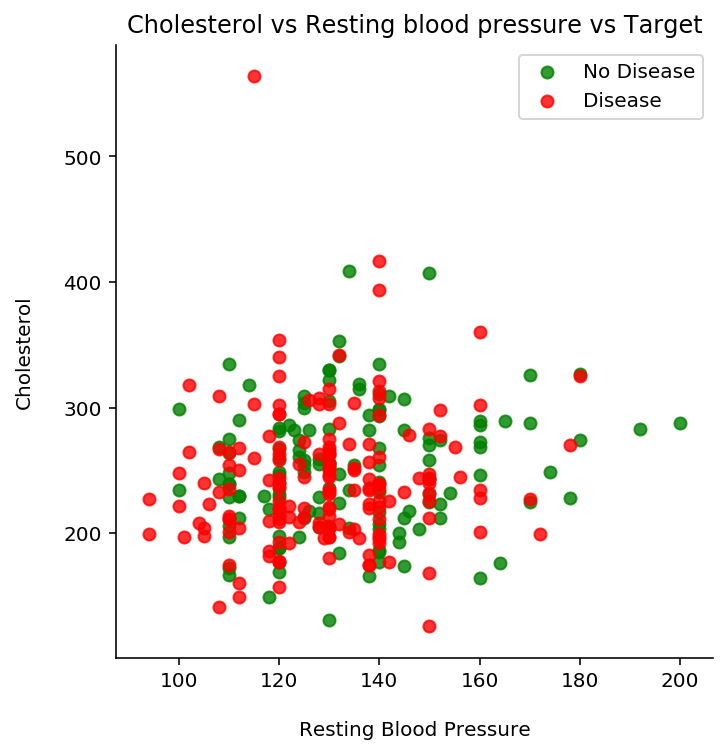

In [135]:
scatter=sns.lmplot(x='Resting_BP',y='Cholesterol',data=heart,hue='Target',legend=False,fit_reg=False,palette=('Green','Red'))
plt.legend(["No Disease", "Disease"],fontsize=10)
plt.xlabel("\nResting Blood Pressure")
plt.ylabel("Cholesterol\n")
plt.title("Cholesterol vs Resting blood pressure vs Target")
plt.show(scatter)
# there is no clear pattern here or we can say resting BP does not show any relationship with cholesterol levels

#### Data Modelling

In [136]:
#comparing models
def anova_deviance_table(*models):
    return pd.DataFrame({'df_residuals': [i.df_resid for i in models],'resid_stddev': [i.deviance for i in models],'df': [i.df_model for i in models],
'deviance': [i.deviance for i in models]})
f1='Target~Age+Sex_M+Chest_pain'
f2='Target~Age*Cholesterol+Sex_M+Chest_pain'
#logistic=statsmodels.genmod.families.family.Binomial(link=statsmodels.genmod.families.links.logit)
glm1=smf.glm(f1,data=heart).fit()
glm2=smf.glm(f2,data=heart).fit()
anova_deviance_table(glm1,glm2)

,df_residuals,resid_stddev,df,deviance
0,297,52.082496,3,52.082496
1,295,51.747844,5,51.747844


In [137]:
#comparing models using AIC and BIC
model_names=['Heart1','Heart2']
mods = [glm1, glm2]
heart_aic=[item.aic for item in mods]
heart_bic=[item.bic for item in mods]
#mods_aic=list(map(statsmodels.regression.linear_model.RegressionResults.aic,mods))
#mods_bic = list(map(statsmodels.regression.linear_model.RegressionResults.bic,mods))
abic = pd.DataFrame({'model': model_names,'aic': heart_aic,'bic': heart_bic})
print(abic)

    model         aic          bic
0  Heart1  334.162314 -1642.929252
1  Heart2  336.222022 -1631.849684


0.8524590163934426


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


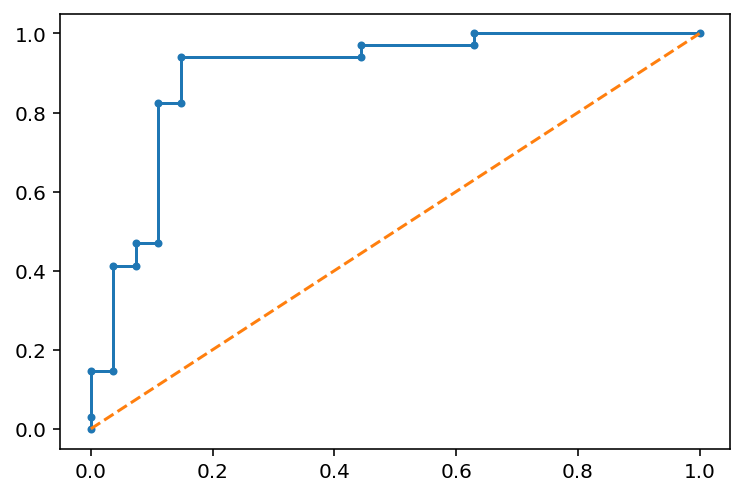

In [138]:
lr=linear_model.LinearRegression()
y,x=dmatrices('Target~Chest_pain+ST_depression+Exercise_Induced_Angina+Max_Heart_Rate+Vessels_coloured_flouroscopy',heart)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)
lr=linear_model.LogisticRegression().fit(x_train,y_train)
y_pred_prod=lr.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prod)
plt.plot(fpr,tpr,marker='.')
plt.plot([0,1],[0,1],linestyle='--')
print(lr.score(x_test,y_test))

In [139]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred_prod)
print(confusion_matrix)

ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [0]:
x_train.shape

In [0]:
x_test.shape

In [0]:
import math as mt
from sklearn.feature_selection import SelectKBest, chi2, RFE, f_classif
plt.rc("font", size=14)

df_OneFeat1 = heart.loc[heart['Target'] == 1]
df_Zero1Feat1 = heart.loc[heart['Target'] == 0]
df_train_OneFeat1 = df_OneFeat1.sample(n=mt.floor(len(df_OneFeat1.index) / 1))
df_train_ZeroFeat1 = df_Zero1Feat1.sample(n=mt.floor(len(df_train_OneFeat1.index) * (len(df_Zero1Feat1.index) / len(df_OneFeat1.index))))
df_train_unbalancedFeat1 = df_train_OneFeat1.append(df_train_ZeroFeat1)

X_trainFeat = df_train_unbalancedFeat1.iloc[:, 0:13]
y_trainFeat = df_train_unbalancedFeat1.iloc[:, 13]
X_trainFeat = X_trainFeat.astype('float')
y_trainFeat = y_trainFeat.astype('int')

X_new = SelectKBest(f_classif, k=13)
fit = X_new.fit(X_trainFeat, y_trainFeat)
np.set_printoptions(precision=4)
arr = fit.scores_
features = fit.transform(X_trainFeat)
col_test = arr.argsort()[-13:][::-1]
print(arr)
#print(col_test)
x = np.array(['Age', 'Sex', 'Chest_pain', 'Resting_BP', 'Cholesterol', 'Fasting_blood_sugar', 'Resting_ECG', 'Max_Heart_Rate',
       'Exercise_Induced_Angina', 'ST_depression', 'ST_slope', 'Vessels_coloured_flouroscopy', 'Thalassemia'])

plt.figure()

plt.bar(x, arr)

plt.title("Anova feature scores for heart disease")
plt.xlabel('Features')
plt.xticks(rotation=90)
plt.ylabel('Univariate score')
plt.show()
# From the Anova test the variables which have a major impact on the response variable are:
# max_heart_rate, chest pain, exercised induced angina, ST depression 

In [0]:
import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")
y,x=dmatrices('Target~Chest_pain+ST_depression+Exercise_Induced_Angina+Max_Heart_Rate',heart)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)
lr=linear_model.LogisticRegression().fit(x_train,y_train)
y_pred_prod=lr.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prod)
plt.plot(fpr,tpr,marker='.')
plt.plot([0,1],[0,1],linestyle='--')
print(lr.score(x_test,y_test))

In [0]:
print(lr.score(x_test,y_test)) # The model is 75% accurate (Predictors are age,sex,chest pain)

In [0]:
#performing logistic regression on the final chosen model
model=smf.logit('Target~Age+Sex_M+Chest_pain',data=heart)
results=model.fit()
results.summary()

In [0]:
odds_ratios = np.exp(results.params)

print(odds_ratios)